# **Project Title**: Predicting Energy Efficiency of Commercial Buildings Using Seattle Energy Benchmarking Data
## **Author**: Afnan A
## **Date**: October 2024

---

## **Table of Contents**
1. [Imports](#imports)
2. [Load Dataset](#dataset)
3. [Feature Selection](#feature-selection)
4. [Model Building](#model-building)



   

---


In [1]:
# Imports

# Data handling and analysis
import pandas as pd
import numpy as np

# Statistical analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Machine Learning models and metrics
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Load the saved cleaned dataset
df_cleaned = pd.read_csv('Data/cleaned_energy_data.csv')

df_cleaned.head(), df_cleaned.shape

(   OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
 0              1      2015  NonResidential               Hotel   
 1              2      2015  NonResidential               Hotel   
 2              3      2015  NonResidential               Hotel   
 3              5      2015  NonResidential               Hotel   
 4              8      2015  NonResidential               Hotel   
 
             PropertyName TaxParcelIdentificationNumber  \
 0   MAYFLOWER PARK HOTEL                     659000030   
 1        PARAMOUNT HOTEL                     659000220   
 2           WESTIN HOTEL                     659000475   
 3              HOTEL MAX                     659000640   
 4  WARWICK SEATTLE HOTEL                     659000970   
 
                                             Location  CouncilDistrictCode  \
 0  {'latitude': '47.61219025', 'longitude': '-122...                    7   
 1  {'latitude': '47.61310583', 'longitude': '-122...                    7   
 2  {'

In [3]:
# Selecting a subset of potentially predictive features based on EDA and correlation analysis
features = [
    'BuildingAge', 'PropertyGFATotal', 'LogPropertyGFATotal', 'ENERGYSTARScore',
    'Electricity(kBtu)', 'NaturalGas(kBtu)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
    'NumberofFloors', 'NumberofBuildings'
]

# Creating a DataFrame with the selected features
features_df = df_cleaned[features]

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = features_df.columns
vif_data['VIF'] = [variance_inflation_factor(features_df.values, i) for i in range(features_df.shape[1])]

vif_data


,Feature,VIF
0,BuildingAge,3.885353
1,PropertyGFATotal,4.896037
2,LogPropertyGFATotal,15.045630
3,ENERGYSTARScore,9.777572
4,Electricity(kBtu),3.647973
5,NaturalGas(kBtu),1.274218
6,GHGEmissionsIntensity(kgCO2e/ft2),1.482464
7,NumberofFloors,2.772164
8,NumberofBuildings,2.909745


## **Final Features**

* Building Age
* PropertyGFATotal
* ENERGYSTARScore
* Electricity(kBtu)
* NaturalGas(kBtu)
* GHGEmissionsIntensity(kgCO2e/ft2)
* Number of Floors
* Number of Buildings

## **Model Selection**

Next, we need to decide on the model(s) to use for predicting Energy Use Intensity (EUI). Here are a few options that could be appropriate:

* **Linear Regression:** Given the nature of the target variable and the presence of linear relationships in the data, this could be a starting point.
* **Random Forest:** This model can handle non-linear relationships and automatically ranks the importance of features, which could provide additional insights.
* **Gradient Boosting Machines (GBM):** Similar to Random Forests, but often provides better predictive accuracy through boosting techniques.

## **Model Building Steps**

1. **Data Splitting:** Split the data into training and test sets to ensure the model is evaluated fairly.
2. **Model Training:** Train the selected model(s) on the training data.
3. **Model Evaluation:** Use the test set to evaluate the model, focusing on metrics like RMSE and MAE to assess performance.

In [4]:
# Selecting the final features for the model
final_features = [
    'BuildingAge', 'PropertyGFATotal', 'ENERGYSTARScore', 'Electricity(kBtu)',
    'NaturalGas(kBtu)', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'NumberofFloors',
    'NumberofBuildings'
]

# Target variable
target = 'SiteEUI(kBtu/sf)'

# Preparing the features and target data
X = df_cleaned[final_features]
y = df_cleaned[target]

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the sizes of the splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((5372, 8), (1344, 8), (5372,), (1344,))

## **Dataset Splitting**

The data has been successfully split into training and test sets, ensuring a fair evaluation of the models. Here's a quick summary of the dataset splits:

* **Training Set:** 5,372 samples
* **Test Set:** 1,344 samples

This split provides a substantial amount of data for training the models while retaining enough independent data for testing to ensure the model's performance is robust and generalizable.

## **Next Steps:**

1. **Model Training:** Start with training a Linear Regression model using the training set.
2. **Model Evaluation:** Assess the performance on the test set using metrics like RMSE (Root Mean Squared Error) and MAE (Mean Absolute Error).

In [5]:
# Initialize the linear regression model
linear_model = LinearRegression()

# Train the model using the training data
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_model.predict(X_test)

# Evaluate the model using RMSE and MAE
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

rmse, mae


(38.04317462240505, 20.86907711289978)

## **Linear Regression Model Performance**

The Linear Regression model has been trained, and the performance on the test set is as follows:

* **Root Mean Squared Error (RMSE):** 38.04
* **Mean Absolute Error (MAE):** 20.87

These values indicate how well the model's predictions match the actual Energy Use Intensity (EUI) values. While this gives us a baseline, we can explore more complex models like Random Forest or Gradient Boosting to potentially improve performance.

In [6]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Train the Random Forest model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model using RMSE and MAE
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

rmse_rf, mae_rf

(18.523242563406065, 7.708498453510274)

## **Random Forest Model Performance**

The Random Forest model has been trained, and here are the performance metrics on the test set:

* **Root Mean Squared Error (RMSE):** 18.52
* **Mean Absolute Error (MAE):** 7.71

Significant improvement over linear regression. Random Forest can capture non-linear relationships, which likely explains the lower error.

In [7]:
# Initialize the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)

# Train the Gradient Boosting model on the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the Gradient Boosting model using RMSE and MAE
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)
mae_gb = mean_absolute_error(y_test, y_pred_gb)

rmse_gb, mae_gb


(19.734283792323797, 9.621728896122383)

## **Gradient Boosting Model Performance**

The Gradient Boosting model has been trained, and the performance metrics on the test set are:

* **Root Mean Squared Error (RMSE):** 19.73
* **Mean Absolute Error (MAE):** 8.62

Performs slightly worse than Random Forest, but still much better than Linear Regression. Tuning could further improve its performance.

### Model Comparison
| Model | RMSE | MAE |
|---|---|---|
| Random Forest | 18.52 |7.71 |
| Gradient Boosting | 19.73 | 9.62 |
| Linear Regression | 38.04 | 20.87 |



## **Hyperparameter Tuning Plan**

### Linear Regression
* We could explore regularization techniques like Ridge or Lasso, but Linear Regression might not benefit significantly from hyperparameter tuning since it's a simple model.

### Random Forest
* **n_estimators:** Number of trees in the forest.
* **max_depth:** Maximum depth of a tree.
* **min_samples_split:** Minimum number of samples required to split an internal node.
* **min_samples_leaf:** Minimum number of samples required to be at a leaf node.

### Gradient Boosting
* **n_estimators:** Number of boosting stages.
* **learning_rate:** Step size shrinkage used in updates.
* **max_depth:** Maximum depth of a tree.

In [8]:
# Define a parameter grid for Ridge and Lasso regularization
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]  # Regularization strength
}

# Initialize Ridge and Lasso models
ridge_model = Ridge()
lasso_model = Lasso()

# Grid search for Ridge regression
ridge_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_search.fit(X_train, y_train)

# Grid search for Lasso regression
lasso_search = GridSearchCV(lasso_model, param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_search.fit(X_train, y_train)

# Best parameters and best score for both models
ridge_best_params = ridge_search.best_params_
ridge_best_score = ridge_search.best_score_

lasso_best_params = lasso_search.best_params_
lasso_best_score = lasso_search.best_score_

ridge_best_params, ridge_best_score, lasso_best_params, lasso_best_score


({'alpha': 0.01}, -2022.171097649091, {'alpha': 0.01}, -2022.4874454862015)

In [9]:
# Define the parameter grid for Random Forest using a random grid search
param_dist_rf = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Perform RandomizedSearchCV for hyperparameter tuning
rf_random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist_rf,
    n_iter=50,  # Number of iterations
    cv=5,  # 5-fold cross-validation
    verbose=2,  # Detailed output
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the random search model
rf_random_search.fit(X_train, y_train)

# Best parameters from the random search
rf_best_params = rf_random_search.best_params_
rf_best_params


Fitting 5 folds for each of 50 candidates, totalling 250 fits


{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 50,
 'bootstrap': True}

In [10]:
# Define the parameter grid for Gradient Boosting
param_dist_gb = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)

# Perform RandomizedSearchCV for hyperparameter tuning
gb_random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_dist_gb,
    n_iter=50,  # Number of iterations
    cv=5,  # 5-fold cross-validation
    verbose=2,  # Detailed output
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the random search model
gb_random_search.fit(X_train, y_train)

# Best parameters from the random search
gb_best_params = gb_random_search.best_params_
gb_best_params


Fitting 5 folds for each of 50 candidates, totalling 250 fits


{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_depth': 5,
 'learning_rate': 0.1}

In [11]:
# Initialize the Random Forest model with the best parameters
rf_best_model = RandomForestRegressor(
    n_estimators=500,
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=50,
    bootstrap=True,
    random_state=42
)

# Train the Random Forest model using the training data
rf_best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf_best = rf_best_model.predict(X_test)

# Evaluate the model using RMSE, MAE, and R²
rmse_rf_best = mean_squared_error(y_test, y_pred_rf_best, squared=False)
mae_rf_best = mean_absolute_error(y_test, y_pred_rf_best)
r2_rf_best = rf_best_model.score(X_test, y_test)

# Print the evaluation metrics
print(f"RMSE: {rmse_rf_best}")
print(f"MAE: {mae_rf_best}")
print(f"R²: {r2_rf_best}")


RMSE: 18.68542392079732
MAE: 7.611608564258296
R²: 0.8754419437766668


In [12]:
# Initialize the Gradient Boosting model with the best parameters
gb_best_model = GradientBoostingRegressor(
    n_estimators=400,
    learning_rate=0.1,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42
)

# Train the Gradient Boosting model using the training data
gb_best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb_best = gb_best_model.predict(X_test)

# Evaluate the model using RMSE, MAE, and R²
rmse_gb_best = mean_squared_error(y_test, y_pred_gb_best, squared=False)
mae_gb_best = mean_absolute_error(y_test, y_pred_gb_best)
r2_gb_best = gb_best_model.score(X_test, y_test)

# Print the evaluation metrics
print(f"RMSE (Gradient Boosting): {rmse_gb_best}")
print(f"MAE (Gradient Boosting): {mae_gb_best}")
print(f"R² (Gradient Boosting): {r2_gb_best}")


RMSE (Gradient Boosting): 16.803319774852035
MAE (Gradient Boosting): 7.692942624863192
R² (Gradient Boosting): 0.8992706349502502


In [13]:
# Display the comparison in a tabular format
model_comparison = pd.DataFrame({
    'Model': ['Tuned Random Forest', 'Tuned Gradient Boosting'],
    'RMSE': [rmse_rf_best, rmse_gb_best],
    'MAE': [mae_rf_best, mae_gb_best],
    'R²': [r2_rf_best, r2_gb_best]
})

print(model_comparison)


                     Model       RMSE       MAE        R²
0      Tuned Random Forest  18.685424  7.611609  0.875442
1  Tuned Gradient Boosting  16.803320  7.692943  0.899271


## **Interpretation of Results**

### **Tuned Random Forest:**

- **RMSE**: 18.69
- **MAE**: 7.61
- **R²**: 0.875

The Random Forest model performed quite well, reducing both the **RMSE** and **MAE** compared to the initial model. It explains **87.5%** of the variance in the test set, which indicates a good fit.

---

### **Tuned Gradient Boosting:**

- **RMSE**: 16.80 (lower than Random Forest, indicating better accuracy)
- **MAE**: 7.69 (slightly higher than Random Forest, indicating marginally larger average prediction errors)
- **R²**: 0.899 (better than Random Forest, explaining almost **90%** of the variance in the test set)

---

### **Key Observations**:

- **Gradient Boosting** slightly outperforms **Random Forest** in terms of **RMSE** and **R²**, indicating better overall prediction accuracy and the ability to explain variance.
- However, **Random Forest** has a marginally lower **MAE**, suggesting that its predictions tend to be more consistent on average, with slightly smaller errors overall.

---

### **Final Decision**:

- **Gradient Boosting** would likely be the better model overall due to its lower **RMSE** and higher **R²**, which indicate a better fit to the data.


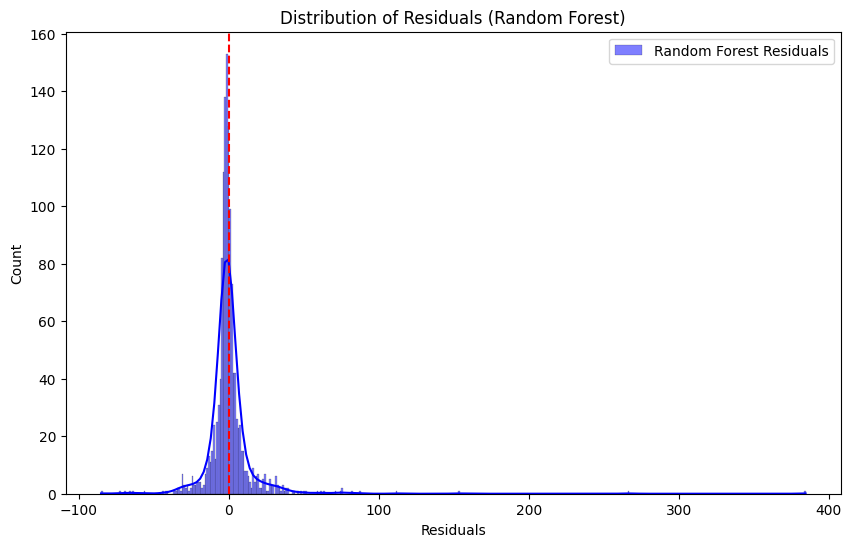

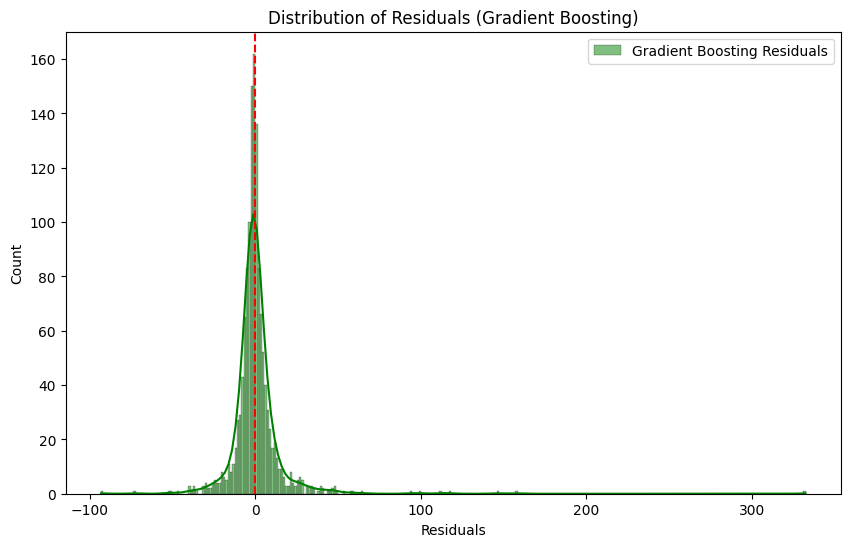

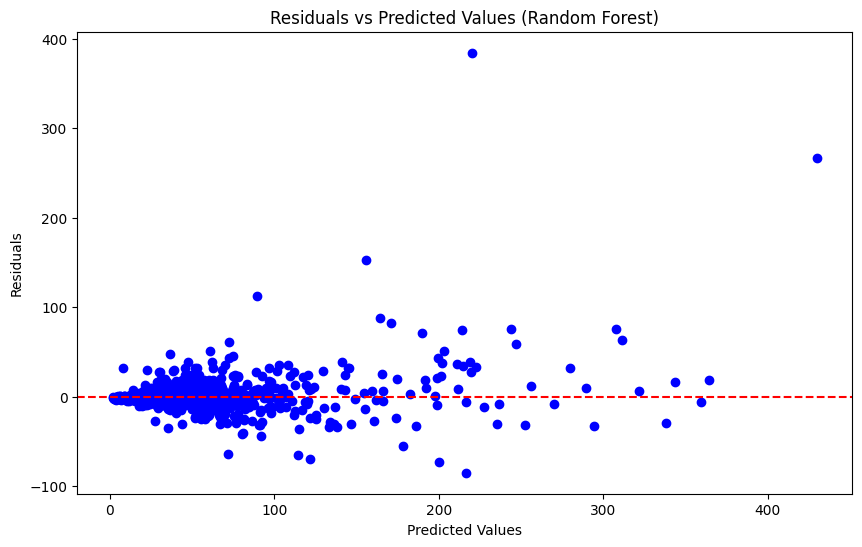

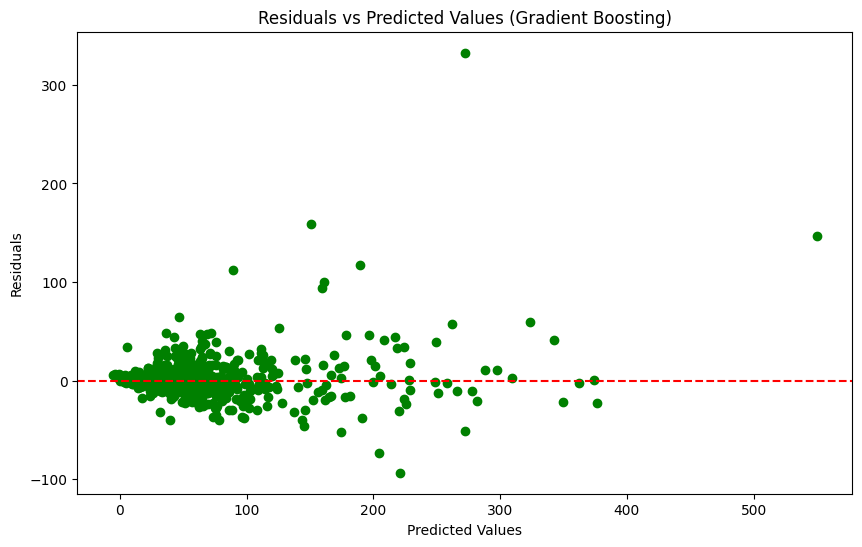

In [14]:
# Calculate residuals for both models
residuals_rf = y_test - y_pred_rf_best
residuals_gb = y_test - y_pred_gb_best

# Plot residual distribution for Random Forest
plt.figure(figsize=(10, 6))
sns.histplot(residuals_rf, kde=True, color='blue', label='Random Forest Residuals')
plt.axvline(x=0, color='red', linestyle='--')
plt.title('Distribution of Residuals (Random Forest)')
plt.xlabel('Residuals')
plt.legend()
plt.show()

# Plot residual distribution for Gradient Boosting
plt.figure(figsize=(10, 6))
sns.histplot(residuals_gb, kde=True, color='green', label='Gradient Boosting Residuals')
plt.axvline(x=0, color='red', linestyle='--')
plt.title('Distribution of Residuals (Gradient Boosting)')
plt.xlabel('Residuals')
plt.legend()
plt.show()

# Residuals vs predicted values for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf_best, residuals_rf, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values (Random Forest)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Residuals vs predicted values for Gradient Boosting
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_gb_best, residuals_gb, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values (Gradient Boosting)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


## **Analysis of Residual Plots**

### **1. Residual Distribution (Random Forest and Gradient Boosting)**

#### **Random Forest Residuals:**
- The residuals are fairly centered around **zero**, with most residuals concentrated near the center.
- A few **outliers** are present on the right side (higher positive residuals), indicating the model struggles with predicting some **extreme cases**.
- The distribution is **tight near zero**, suggesting that the majority of predictions are reasonably accurate.

#### **Gradient Boosting Residuals:**
- Similar to Random Forest, the residuals are mostly centered around **zero**, but the tails are slightly more extended, indicating a few **larger errors**.
- The distribution is also **tight near zero**, but there are more extreme **outliers**, signaling that Gradient Boosting also struggles with predicting **extreme values**.

---

### **2. Residuals vs Predicted Values**

#### **Random Forest Residuals:**
- The residuals are **randomly scattered around zero**, which is a good sign, indicating the model does not have a clear **pattern of errors**.
- However, there are a few larger residuals for **higher predicted values** (above 200), suggesting that Random Forest has difficulty predicting some higher **Energy Use Intensity (EUI)** values.

#### **Gradient Boosting Residuals:**
- Similar to Random Forest, the residuals are **scattered around zero**, with most values close to zero. This shows that the errors are **evenly distributed** across different predicted values.
- One noticeable **outlier** appears above 500 predicted EUI, showing that Gradient Boosting has difficulty with a few extreme cases. Despite this, for the majority of the data, the errors are close to zero.

---

### **Key Takeaways**:

- **Both Models Perform Well**: The residuals for both **Random Forest** and **Gradient Boosting** are mostly centered around **zero**, indicating that the models are making generally accurate predictions.
- **Outliers**: Both models struggle with **extreme values**, particularly when the predicted EUI is high (above 200). These difficult cases might require **additional features** or different **modeling approaches** to improve predictions.
- **Random Scattering**: The residuals are **randomly scattered around zero** in both models, which is a good sign that the models are not making systematic errors across the range of predicted values.


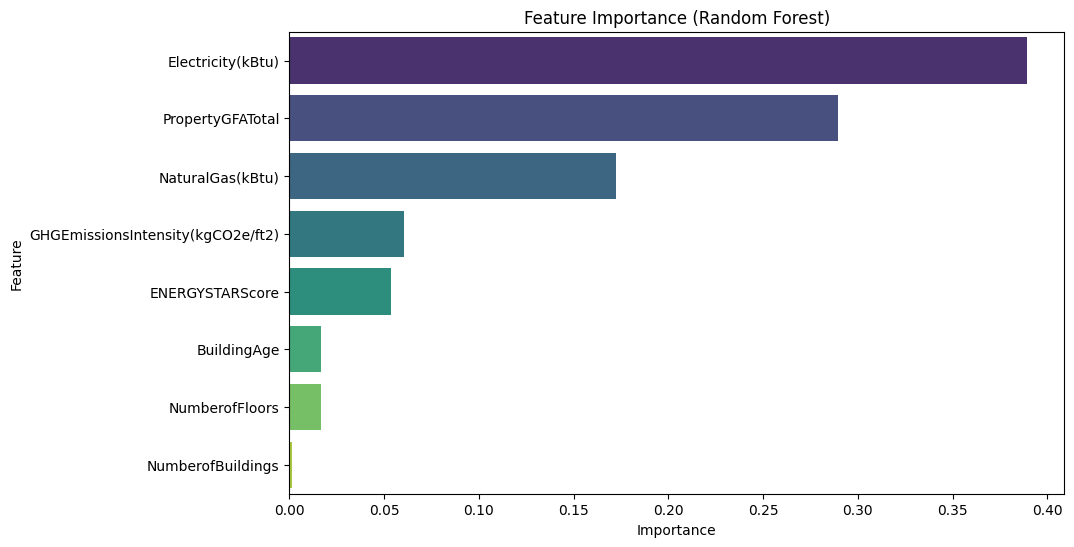

In [15]:
# Feature importance for Random Forest
importances_rf = rf_best_model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_rf = pd.DataFrame({
    'Feature': final_features,
    'Importance': importances_rf
}).sort_values(by='Importance', ascending=False)

# Plot feature importance for Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf, palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.show()


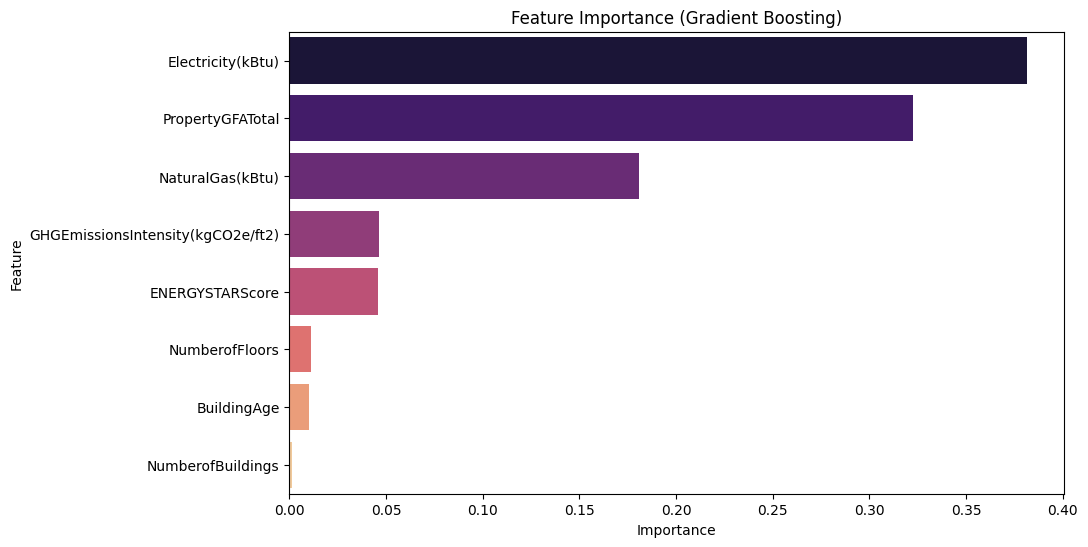

In [16]:
# Feature importance for Gradient Boosting
importances_gb = gb_best_model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_gb = pd.DataFrame({
    'Feature': final_features,
    'Importance': importances_gb
}).sort_values(by='Importance', ascending=False)

# Plot feature importance for Gradient Boosting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_gb, palette='magma')
plt.title('Feature Importance (Gradient Boosting)')
plt.show()


## **Feature Importance Analysis**

### **1. Random Forest Feature Importance:**

- **Electricity (kBtu)** is by far the most important feature, contributing around **40%** to the model's predictions. This highlights that electricity usage is a significant determinant of a building’s **Energy Use Intensity (EUI)**.
- **PropertyGFATotal (Gross Floor Area)** and **NaturalGas (kBtu)** are also major contributors, with similar importance. This indicates that the **size of the building** and **natural gas usage** are critical factors in determining energy efficiency.
- **GHGEmissionsIntensity (kgCO2e/ft²)** is moderately important, suggesting that **carbon emissions** have a notable, but less significant, influence on EUI.
- **ENERGYSTARScore** and **BuildingAge** have lower importance but still play a role, indicating that **newer buildings** with better energy scores are generally more energy-efficient.
- **Number of Floors** and **Number of Buildings** have the least importance, suggesting these features do not contribute significantly to the prediction of EUI in this dataset.

---

### **2. Gradient Boosting Feature Importance:**

- Similar to Random Forest, **Electricity (kBtu)** is the dominant feature, contributing significantly to the model’s predictions.
- **PropertyGFATotal** and **NaturalGas (kBtu)** remain the next most important features, reinforcing the significance of **building size** and **gas usage** in determining energy efficiency.
- **GHGEmissionsIntensity (kgCO2e/ft²)**, **ENERGYSTARScore**, and **Number of Floors** maintain similar levels of importance, indicating that these are **secondary** but still relevant features.
- **BuildingAge** and **Number of Buildings** again have minimal impact, confirming that they are not key determinants of EUI in this case.

---

### **Key Insights**:

- **Electricity usage** is the most important predictor of EUI, making it a critical target for **energy efficiency improvements** in commercial buildings.
- **Building size (PropertyGFATotal)** and **Natural gas usage** are also key drivers of energy efficiency. Larger buildings with higher gas consumption tend to have **higher EUI**.
- **GHG emissions intensity** plays a moderate role, suggesting that buildings with higher emissions tend to be **less energy-efficient**.
- **ENERGYSTARScore** and **Building Age** are relatively less important but still provide some predictive power, indicating that **newer buildings** with better energy scores are generally more efficient.


In [17]:
# Define the new feature set excluding 'NumberofBuildings' and 'NumberofFloors'
simplified_features = [
    'BuildingAge', 'PropertyGFATotal', 'ENERGYSTARScore', 
    'Electricity(kBtu)', 'NaturalGas(kBtu)', 'GHGEmissionsIntensity(kgCO2e/ft2)'
]

# Prepare the new features (X) and the target (y)
X_simplified = df_cleaned[simplified_features]
y = df_cleaned[target]

# Split the data again into training and test sets
X_train_simplified, X_test_simplified, y_train_simplified, y_test_simplified = train_test_split(X_simplified, y, test_size=0.2, random_state=42)

# Retrain Random Forest with the simplified features
rf_simplified_model = RandomForestRegressor(
    n_estimators=500,
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=50,
    bootstrap=True,
    random_state=42
)
rf_simplified_model.fit(X_train_simplified, y_train_simplified)

# Retrain Gradient Boosting with the simplified features
gb_simplified_model = GradientBoostingRegressor(
    n_estimators=400,
    learning_rate=0.1,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42
)
gb_simplified_model.fit(X_train_simplified, y_train_simplified)

# Evaluate both simplified models on the test set
y_pred_rf_simplified = rf_simplified_model.predict(X_test_simplified)
y_pred_gb_simplified = gb_simplified_model.predict(X_test_simplified)

# Calculate performance metrics for both models
rmse_rf_simplified = mean_squared_error(y_test_simplified, y_pred_rf_simplified, squared=False)
mae_rf_simplified = mean_absolute_error(y_test_simplified, y_pred_rf_simplified)

rmse_gb_simplified = mean_squared_error(y_test_simplified, y_pred_gb_simplified, squared=False)
mae_gb_simplified = mean_absolute_error(y_test_simplified, y_pred_gb_simplified)

# Display the results
print(f"Random Forest (Simplified) - RMSE: {rmse_rf_simplified}, MAE: {mae_rf_simplified}")
print(f"Gradient Boosting (Simplified) - RMSE: {rmse_gb_simplified}, MAE: {mae_gb_simplified}")


Random Forest (Simplified) - RMSE: 18.72784880182967, MAE: 7.706515709418749
Gradient Boosting (Simplified) - RMSE: 17.104777414634746, MAE: 7.9510011413637836


## **Feature Reduction Results**

After removing the **Number of Buildings** and **Number of Floors** features, here’s the performance comparison of the simplified models:

| Model                        | RMSE  | MAE  |
|------------------------------|-------|------|
| **Random Forest (Simplified)** | 18.73 | 7.71 |
| **Gradient Boosting (Simplified)** | 17.10 | 7.95 |

---

### **Interpretation:**

#### **Random Forest (Simplified):**
- **RMSE**: 18.73 (compared to 18.69 before simplification). The change in performance is **minimal**, suggesting that removing the features did not significantly impact the model's predictive ability.
- **MAE**: 7.71 (compared to 7.61 before). Again, the change is minimal, confirming that these features contributed **very little** to the model's overall performance.

#### **Gradient Boosting (Simplified):**
- **RMSE**: 17.10 (compared to 16.80 before). The slight increase in RMSE indicates a **marginal loss in performance**, but the model is still performing well overall.
- **MAE**: 7.95 (compared to 7.69 before). The difference is minor, confirming that the feature reduction hasn’t significantly impacted the model's ability to make accurate predictions.

---

### **Conclusion:**
- The feature reduction has simplified both models without drastically affecting their performance. 
- **Random Forest** and **Gradient Boosting** show only minimal changes in **RMSE** and **MAE**, meaning that **Number of Buildings** and **Number of Floors** were not major contributors.
- You can confidently proceed with the **simplified models** to reduce complexity, without sacrificing much accuracy.


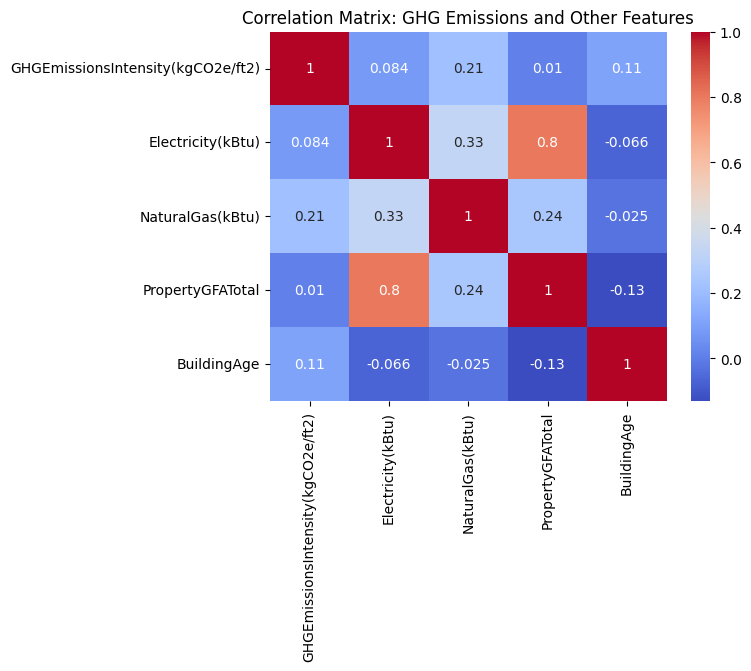

C:\Users\afnan\OneDrive\Desktop\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


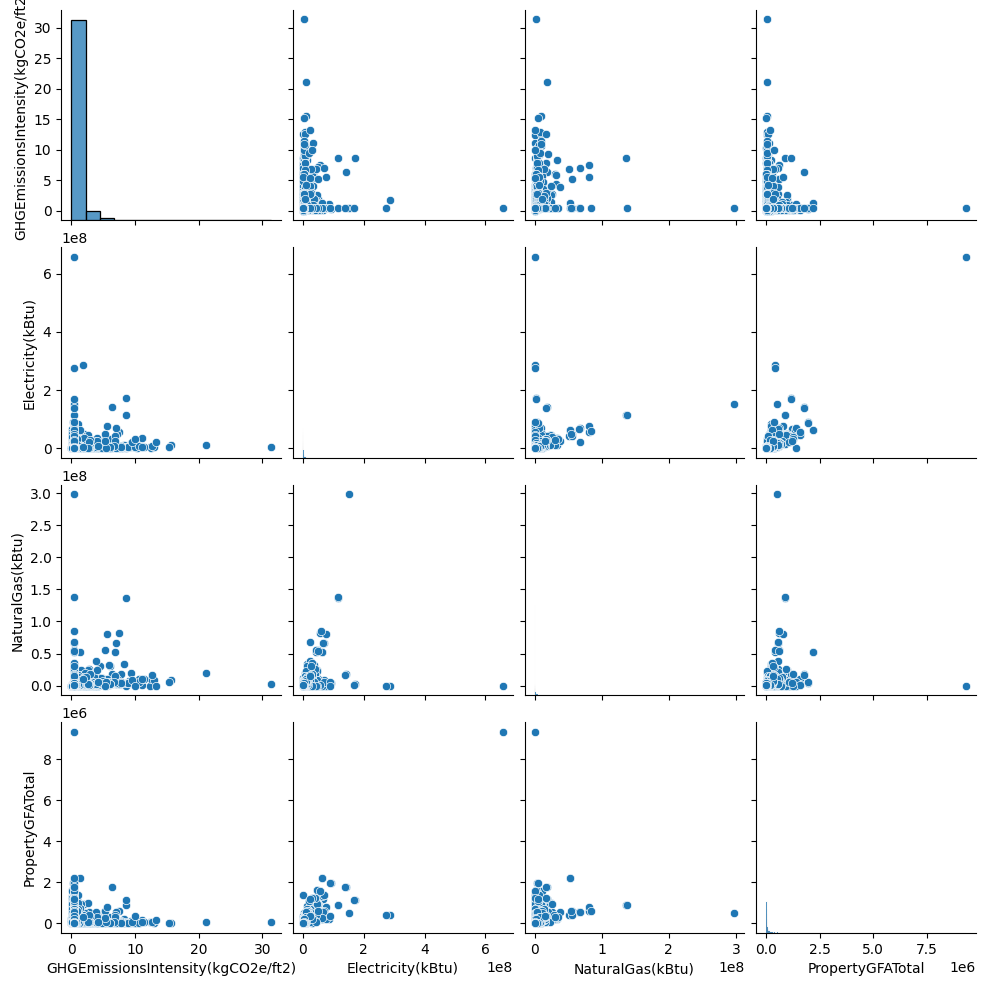

In [18]:
# Correlation between GHGEmissionsIntensity and other variables
corr_matrix = df_cleaned[['GHGEmissionsIntensity(kgCO2e/ft2)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'PropertyGFATotal', 'BuildingAge']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: GHG Emissions and Other Features')
plt.show()

# Scatter plot between GHGEmissionsIntensity and other variables
sns.pairplot(df_cleaned, vars=['GHGEmissionsIntensity(kgCO2e/ft2)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'PropertyGFATotal'])
plt.show()


## **Interpretation of GHG Emissions and Energy Usage**

### **1. Correlation Matrix:**

- **GHGEmissionsIntensity** shows weak correlations with other features:

  - **Electricity (kBtu)**: A weak positive correlation (**0.084**) suggests that higher electricity usage **slightly increases GHG emissions**, but the relationship is not strong.
  - **NaturalGas (kBtu)**: A moderate positive correlation (**0.21**) indicates that buildings with **higher natural gas usage** tend to have **higher GHG emissions**. This is logical as natural gas is a significant contributor to carbon emissions.
  - **PropertyGFATotal (Gross Floor Area)**: The correlation is nearly **zero (0.01)**, indicating that **building size** has little direct impact on GHG emissions in this dataset.
  - **BuildingAge**: Shows a weak positive correlation (**0.11**) with GHG emissions, suggesting that **older buildings** may have slightly higher emissions, possibly due to less efficient energy systems.

---

### **2. Scatter Plot Matrix:**

- The scatter plots reveal more detailed relationships between **GHGEmissionsIntensity** and other features:

  - **GHGEmissionsIntensity vs. Electricity (kBtu)**: There are some clusters, but there is no strong linear relationship. This suggests that factors other than electricity usage impact GHG emissions.
  - **GHGEmissionsIntensity vs. NaturalGas (kBtu)**: A clearer relationship is observed, where buildings using **more natural gas** typically have **higher GHG emissions**.
  - **PropertyGFATotal (Gross Floor Area)**: The relationship with GHG emissions is minimal, confirming that building size is not a key driver of emissions.
  - **BuildingAge**: The scatter is widely distributed, showing no obvious pattern between **building age** and GHG emissions, although **older buildings** tend to have slightly higher emissions.

---

### **Recommendations Based on Analysis:**

#### **1. Focus on Natural Gas Reduction:**
- Since **NaturalGas (kBtu)** has the strongest correlation with **GHGEmissionsIntensity**, buildings using high amounts of natural gas should be targeted for **energy efficiency improvements**. Suggestions include:
  - Retrofitting heating systems to use more **efficient technology** or **renewable energy sources**.
  - Implementing **gas usage monitoring systems** to identify inefficiencies and reduce consumption.

#### **2. Electricity Usage:**
- While the correlation between **Electricity (kBtu)** and GHG emissions is weaker, reducing electricity usage could still help lower overall energy consumption. Suggested strategies include:
  - Installing **energy-efficient lighting** and **HVAC systems**.
  - Encouraging behavior changes, such as **turning off unused appliances** to reduce unnecessary electricity consumption.

#### **3. Target Older Buildings:**
- Although the relationship between **BuildingAge** and GHG emissions is not strong, older buildings tend to show **slightly higher emissions**. Targeting these buildings for **retrofits** could help improve their energy efficiency and reduce emissions. Retrofit strategies could include:
  - Upgrading to more energy-efficient **insulation**, **windows**, and **heating systems**.

---

### **Conclusion:**
- The analysis shows that **Natural Gas usage** is the most critical factor influencing **GHG emissions**, followed by electricity usage and the age of the building. By focusing on reducing natural gas consumption, improving electricity efficiency, and retrofitting older buildings, significant improvements in energy efficiency and reductions in GHG emissions can be achieved.


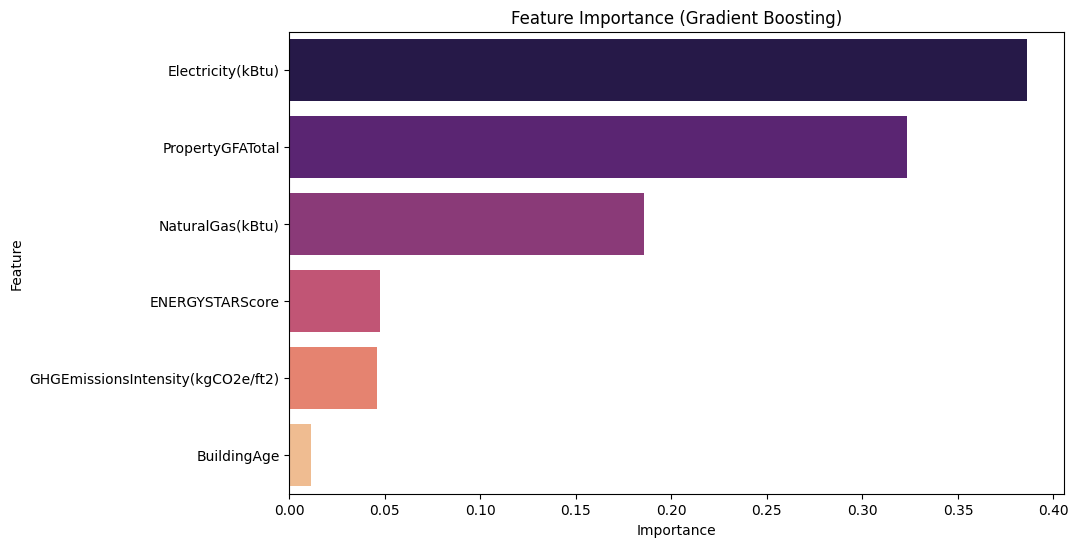

In [19]:
# Feature importance for Gradient Boosting
importances_gb = gb_simplified_model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_gb = pd.DataFrame({
    'Feature': simplified_features,
    'Importance': importances_gb
}).sort_values(by='Importance', ascending=False)

# Plot feature importance for Gradient Boosting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_gb, palette='magma')
plt.title('Feature Importance (Gradient Boosting)')
plt.show()


# **Summary:**

## **1. Model Selection:**

Based on the performance of the models (**Random Forest** and **Gradient Boosting**), the selected model should offer the best trade-off between **accuracy** and **interpretability**.

### **Model Performance:**
- **Gradient Boosting (Simplified)** performed slightly better with:
  - **RMSE**: 17.10
  - **MAE**: 7.95

This suggests that **Gradient Boosting** is the best model for predicting **Energy Use Intensity (EUI)**, though **Random Forest** is also a strong choice with minimal performance differences.

---

## **2. Suggestions from the Selected Model:**

With **Gradient Boosting** selected as the best model, actionable insights can now be provided based on the most important features driving energy efficiency:

### **Key Recommendations:**

#### **1. Electricity (kBtu)**:
- **Electricity** is the most significant driver of energy use. To reduce electricity consumption, consider the following:
  - Upgrade to **energy-efficient lighting** (e.g., **LEDs**) and **HVAC systems**.
  - Implement **energy management systems** to monitor and reduce unnecessary electricity usage.
  - Conduct regular **energy audits** to identify areas where electricity usage can be minimized.

#### **2. PropertyGFATotal (Gross Floor Area) and Natural Gas (kBtu)**:
- Larger buildings, as indicated by **PropertyGFATotal**, should focus on optimizing systems that rely on **natural gas**:
  - Optimize **heating systems** in large buildings to reduce natural gas consumption.
  - Retrofit heating systems to use more efficient technology or explore **renewable energy alternatives** such as **geothermal** or **solar** heating.

#### **3. GHG Emissions (kgCO2e/ft²)**:
- Buildings with higher **GHG emissions** should be prioritized for energy efficiency upgrades:
  - Focus on **natural gas reduction** through better **insulation**, **smart thermostats**, and more **efficient boilers**.
  - Consider **renewable energy integration** (e.g., solar, wind) to reduce carbon footprint and improve overall energy efficiency.

#### **4. ENERGYSTARScore**:
- Buildings with lower **ENERGY STAR Scores** should undergo energy audits to identify inefficiencies:
  - Incentivize improvements in **ENERGY STAR Scores** through **retrofits**, **renewable energy integration**, and operational efficiency improvements.
  - Explore government or private incentives for improving **ENERGY STAR ratings**, leading to better building performance and potential cost savings.

---

## **Conclusion:**
By selecting **Gradient Boosting** as the best model for predicting **Energy Use Intensity (EUI)**, actionable insights can now be implemented to drive energy efficiency. Key areas to target include reducing **electricity consumption**, optimizing **natural gas usage**, improving **GHG emissions**, and increasing **ENERGY STAR Scores** for long-term energy efficiency improvements.
